# Titanic Kaggle

In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Preparação das bibliotecas e funções

In [119]:
# Manipulação dos dados
import numpy as np
import pandas as pd

# Visualização dos dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Transformação dos dados
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Metricas de classificação
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelos de classificação
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Testes de hipótese
from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

In [120]:
###### configurations for image quality##################
plt.rcParams["figure.figsize"] = [8, 6]                ##
plt.rcParams['figure.dpi'] = 100                       ## 
plt.rc('font', size=10)                                ## 
plt.rc('axes', titlesize=14)                           ## 
plt.rc('axes', labelsize=12)                           ##
plt.rc('xtick', labelsize=12)                          ##
plt.rc('ytick', labelsize=12)                          ##
plt.rc('legend', fontsize=12)                          ##
plt.rc('legend', title_fontsize=12)                    ##
plt.rc('figure', titlesize=10)                         ## 
sns.set_style('darkgrid')                              ##
my_palette = sns.color_palette(['#12011c', '#6100c2']) ##
my_color = '#6100c2'                                      ##
#########################################################

In [121]:
def bar_label(ax, position='edge'):
  for container in ax.containers:
    ax.bar_label(
        container,
        fmt=' %.1f',
        label_type=position,
        color='Black'
    )

In [122]:
def bar_porc(df, colum):
  for index, row in df.iterrows():
    plt.annotate(str(row[colum]) + '%', xy=(index, row[colum]), ha='center', va='bottom')

## Carregamento e descrição dos dados

In [123]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
result = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [124]:
result = result['Survived'].values

In [125]:
# Survived -> 0 = No, 1 = Yes
# Pclass -> 1 = 1st, 2 = 2nd, 3 = 3rd
# Embarked -> C = Cherbourg, Q = Queenstown, S = Southampton

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [128]:
print(f'shape train:  {train.shape}')
print(f'shape test:   {test.shape}')
print(f'shape result: {result.shape}')

shape train:  (891, 12)
shape test:   (418, 11)
shape result: (418,)


In [129]:
print(train.info())
print('-'*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

Variaveis categoricas:
* Nominal: Survived, Name, Sex, Ticket e Embarked.
* Ordinal: PassengerID, Pclass e Cabin.

Variaveis numericas:
* Discreta: Sibsp e Parch.
* Continua: Age e Fare.

In [130]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [131]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [132]:
print(train.describe())
print('-'*67)
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
-------------------------------------------------------------------
       Passen

## Verificação de qualidade dos dados

In [133]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [134]:
train.isna().sum().sort_values(ascending=False).head()/len(train)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
dtype: float64

In [135]:
test.isna().sum().sort_values(ascending=False).head()/len(test)*100

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
dtype: float64

PassengerID, Ticket e Cabin, são variaveis que não influenciam em uma forma geral em Survived.

Considera-las por uma rara ocasião em que um passageiro não sobreviveu devido a sua cabine ter algum problema dentro ou fora, com dificuldade na passagem, seria especificar demais uma situação.

In [136]:
id_train = train['PassengerId']
id_test = test['PassengerId']

In [137]:
train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [138]:
train.isna().sum().sort_values(ascending=False).head()/len(train)*100

Age         19.865320
Embarked     0.224467
Survived     0.000000
Pclass       0.000000
Name         0.000000
dtype: float64

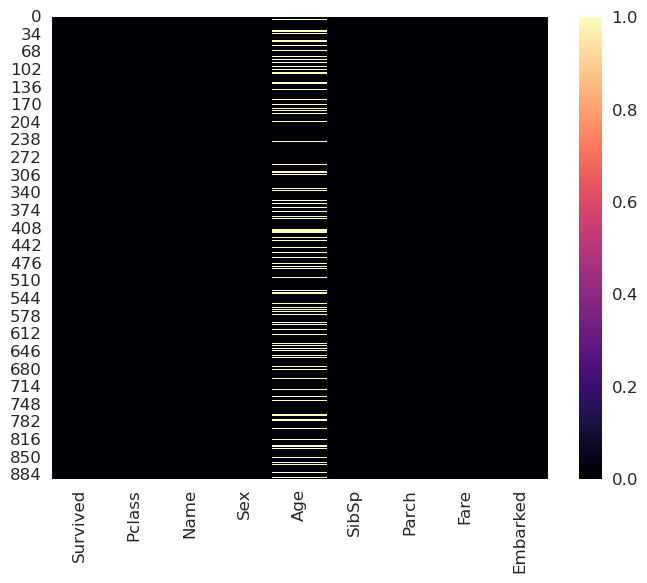

In [139]:
sns.heatmap(train.isna(), cmap='magma')
plt.show()

In [140]:
test.isna().sum().sort_values(ascending=False).head()/len(test)*100

Age       20.574163
Fare       0.239234
Pclass     0.000000
Name       0.000000
Sex        0.000000
dtype: float64

<AxesSubplot:>

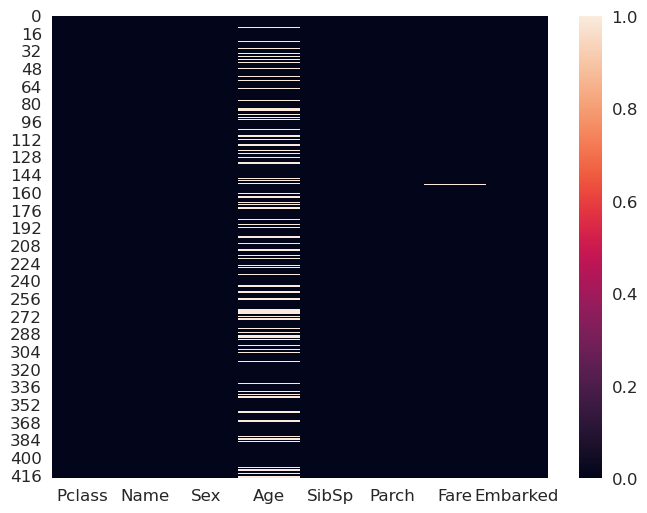

In [141]:
sns.heatmap(test.isna())

In [142]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [143]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


Para substituir valores faltantes da variavel "Age", com base no local de embarque, primeiro temos que lidar com os valores faltantes da variavel "Embarked", se isso não for feito, quando utilizar-mos um valor com "Embarked" ausente, estaremos adicionando mais ausentes em "Age".

In [144]:
train['Embarked'] = train['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))

In [145]:
train['Age'] = train.groupby('Embarked')['Age'].transform(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby('Embarked')['Age'].transform(lambda x: x.fillna(x.median()))

In [146]:
train.isna().sum().sort_values(ascending=False).head()/len(train)*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
dtype: float64

In [147]:
test.isna().sum().sort_values(ascending=False).head()/len(test)*100

Fare      0.239234
Pclass    0.000000
Name      0.000000
Sex       0.000000
Age       0.000000
dtype: float64

In [148]:
# Localizando linhas com o valor faltante

for index, row in test.iterrows():
  if pd.isna(row['Fare']):
    print(row)

Pclass                       3
Name        Storey, Mr. Thomas
Sex                       male
Age                       60.5
SibSp                        0
Parch                        0
Fare                       NaN
Embarked                     S
Name: 152, dtype: object


In [149]:
# Substituindo o valor faltante pela mediana com base na classe e no embarque

test['Fare'] = test['Fare'].fillna(test.query('Pclass == 3 and Embarked == "S"')['Fare'].median())

In [150]:
test.isna().sum().sort_values(ascending=False).head()/len(test)*100

Pclass    0.0
Name      0.0
Sex       0.0
Age       0.0
SibSp     0.0
dtype: float64

## Análise de outliers

<AxesSubplot:xlabel='Age'>

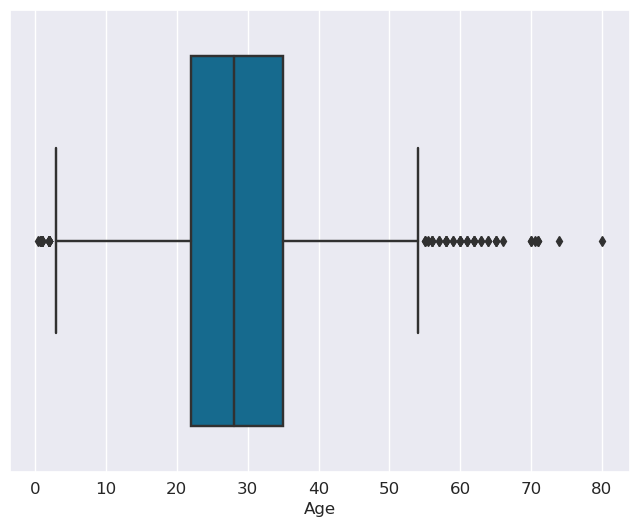

In [151]:
sns.boxplot(data=train, x='Age')

As idades não possuem valores negativos e nem valores extremos, estão dentro de um intervalo aceitavel, no qual, vamos ter de bebês à idosos embarcados.

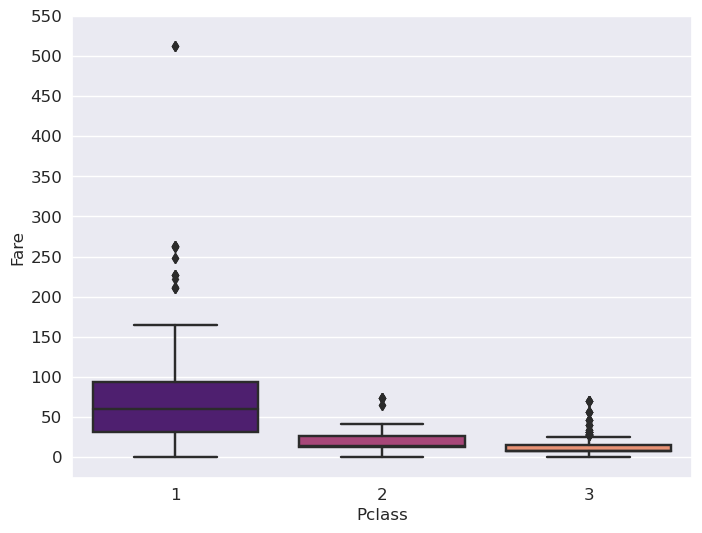

In [152]:
sns.boxplot(data=train, x='Pclass', y='Fare', palette='magma')
plt.yticks(np.arange(0,551,50))
plt.show()

In [153]:
q1_class_p = train[train['Pclass'] == 1]["Fare"].quantile(0.25)
q3_class_p = train[train['Pclass'] == 1]["Fare"].quantile(0.75)
iqr_class_p = q3_class_p - q1_class_p
print('1° Class')
print(f'Q1: {q1_class_p}')
print(f'Q1: {q3_class_p}')
print(f'IQR: {iqr_class_p}')

1° Class
Q1: 30.923949999999998
Q1: 93.5
IQR: 62.57605


In [154]:
train.query('Fare > @q3_class_p + @iqr_class_p*1.5 and Pclass == 1').sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
779,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,211.3375,S
730,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S
689,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,211.3375,S
377,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,211.5000,C
527,0,1,"Farthing, Mr. John",male,28.0,0,0,221.7792,S
716,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,227.5250,C
700,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C
380,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,227.5250,C
557,0,1,"Robbins, Mr. Victor",male,29.0,0,0,227.5250,C
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,C


Na primeira classe, as pessoas que pagaram mais que o limite superior, pagaram esse valor a mais, para levar outras pessoas, mas três pessoas estão com 'Fare' de 512 e embarcaram no mesmo local, mas uma delas levou uma pessoa a mais, talvez seja uma suíte de luxo.

In [155]:
q1_class_s = train[train['Pclass'] == 2]["Fare"].quantile(0.25)
q3_class_s = train[train['Pclass'] == 2]["Fare"].quantile(0.75)
iqr_class_s = q3_class_s - q1_class_s
train.query('Fare > @q3_class_s + @iqr_class_s*1.5 and Pclass == 2').sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
615,1,2,"Herman, Miss. Alice",female,24.0,1,2,65.0,S
754,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,65.0,S
72,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,73.5,S
120,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,73.5,S
385,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,73.5,S
655,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,73.5,S
665,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,73.5,S


Na segunda classe, as pessoas que possuem o 'Fare' maior que o limite superior, é devido a quantidade de pessoas que estão levando.

In [156]:
q1_class_t = train[train['Pclass'] == 3]["Fare"].quantile(0.25)
q3_class_t = train[train['Pclass'] == 3]["Fare"].quantile(0.75)
iqr_class_t = q3_class_t - q1_class_t
train.query('Fare > @q3_class_t + @iqr_class_t*1.5 and Pclass == 3').sort_values('Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
819,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,27.9000,S
63,0,3,"Skoog, Master. Harald",male,4.0,3,2,27.9000,S
642,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,27.9000,S
634,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,27.9000,S
360,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,27.9000,S
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,27.9000,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,Q
787,0,3,"Rice, Master. George Hugh",male,8.0,4,1,29.1250,Q
278,0,3,"Rice, Master. Eric",male,7.0,4,1,29.1250,Q


Assim como na segunda classe, os valore de 'Fare' que são maiores que o limite superior na terceira classe, é devido a quantidade de pessoas que estão levando.

In [157]:
iqr_class_p , iqr_class_s, iqr_class_t

(62.57605, 13.0, 7.75)

## visualização dos dados

In [158]:
price_class = train.groupby('Pclass')['Fare'].median().reset_index()
price_class

,Pclass,Fare
0,1,60.2875
1,2,14.2500
2,3,8.0500


* Ao observarmos a mediana dos preços das classes, temos que a 1°classe é muito mais cara que as demais.
* Podemos analisar a porcentagem de sobreviventes em cada classe, e verificar se a 1° classe foi privilegiada na fuga ao naufragio.

In [159]:
a = train["Age"].max()

In [160]:
# A pessoa mais velha embarcada

train.query(f'Age >= {train["Age"].max()}')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.0,S


In [161]:
# A pessoa mais jovem embarcada

train.query(f'Age <= {train["Age"].min()}')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,8.5167,C


* A pessoa mais velha e a pessoa mais jovem a embarcar são do sexo masculino e ambos sobreviveram.

* A principal diferença entre essas pessoas, são suas classes de embarque, onde o senhor Mr. Barkworth estava na classe mais cara, onde possivelmente teria mais privilegios para a fuga devido a sua classe.

* O jovem Master Thomas pode ter tido uma melhor chance de fuga por ser um bebê, pois como no filme do Titanic é dito:

                                               Mulheres e crianças primeiro.

Mas claro que isso so ocorreu nesta história do Titanic, pesquisas mostram que a maior porcentagem de sobreviventes em naufragios são homens, e que a grande maioria dos sobreviventes, são os tripulantes.

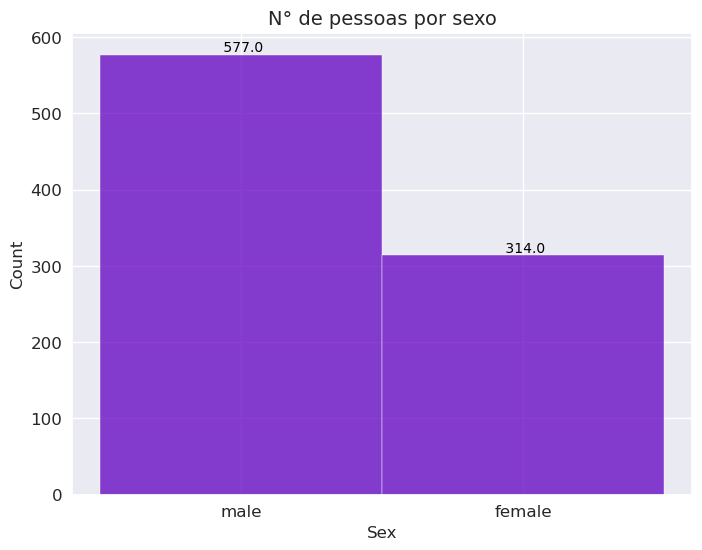

In [162]:
ax = sns.histplot(data=train, x='Sex', color=my_color)
bar_label(ax)  
plt.title('N° de pessoas por sexo')
plt.show()

In [163]:
sex_survived = train.groupby('Sex')['Survived'].sum()
sex_survived = sex_survived.reset_index()

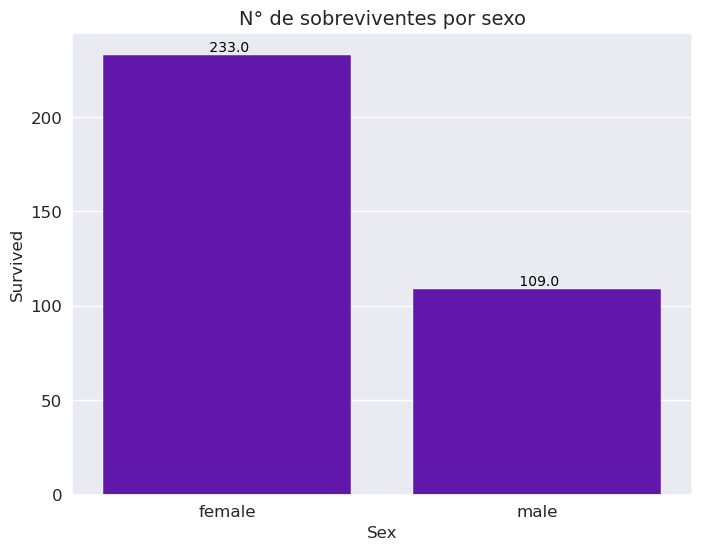

In [164]:
ax = sns.barplot(data=sex_survived, x='Sex', y='Survived',color=my_color)
bar_label(ax)  
plt.title('N° de sobreviventes por sexo')
plt.show()

In [165]:
sex_survived_porc = train.groupby('Sex')['Survived'].sum() * 100 / train.groupby('Sex')['Survived'].count()
sex_survived_porc = sex_survived_porc.round().reset_index()

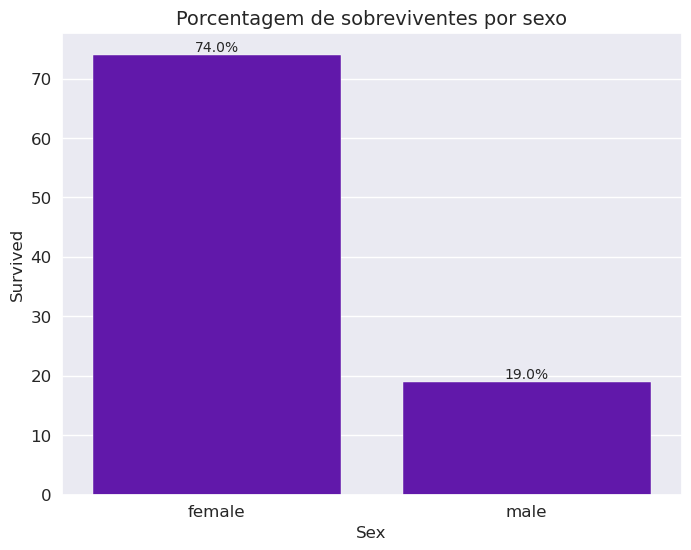

In [166]:
ax = sns.barplot(data=sex_survived_porc, x='Sex', y='Survived', color=my_color)
bar_porc(sex_survived_porc, 'Survived')  
plt.title('Porcentagem de sobreviventes por sexo')
plt.show()

* Se o ditado, "mulheres e crianças primeiro" realmente tiver sido seguido, então temos um explicação para estes gráficos.

In [167]:
age_count = train.groupby('Age')['Name'].count().reset_index(name='Count')

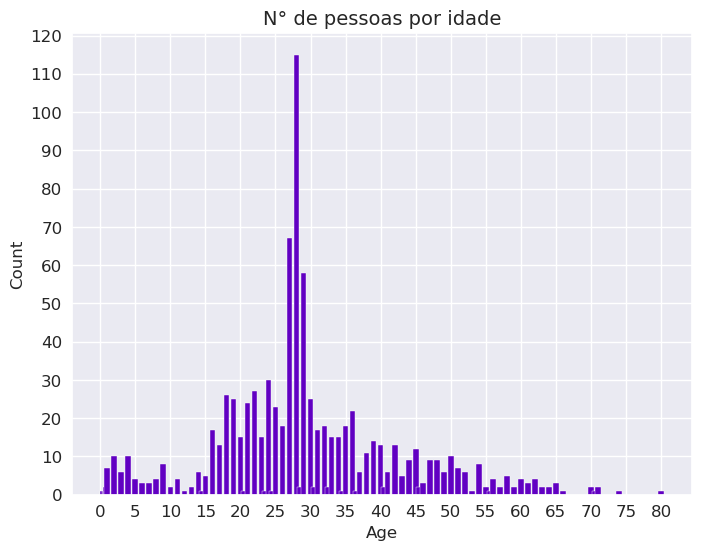

In [168]:
plt.bar(age_count['Age'], age_count['Count'], color=my_color)
plt.title('N° de pessoas por idade')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(0,81,5))
plt.yticks(np.arange(0,121,10))
plt.show()

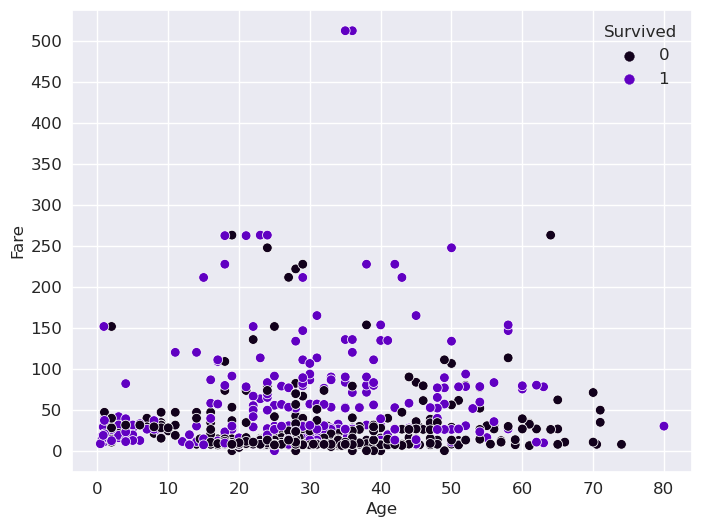

In [169]:
ax = sns.scatterplot(data=train, x='Age', y='Fare', palette=my_palette, hue='Survived')
plt.yticks(np.arange(0,501,50))
plt.show()

* Podemos ver que muitas crianças entre 0 e 10 anos, sobreviveram.
* Muitas pessoas entre 60 e 80 não sobreviveram.
* Muitas pessoas entre 10 e 60 não sobreviveram, entre elas, as que pagaram por classes mais baratas, é notavel a quantidade de pessoas que pagagaram por classes mais caras e sobrevivel.

In [170]:
age_groups = [(0,10), (10,20), (20,30), (30,40), (40,50), (50,60), (60,70), (70,80)]
age_rate = [age_count.query('Age > @age[0] and Age <= @age[1]')['Count'].sum() for age in age_groups]

In [171]:
age_yes = train[train['Survived'] == 1].groupby('Age')['Survived'].count().reset_index()
survival_rate = [age_yes.query('Age > @age[0] and Age <= @age[1]')['Survived'].sum() for age in age_groups]
survival_rate_porc = []

In [172]:
for i in range(len(survival_rate)):
  survival_rate_porc.append(round(survival_rate[i]*100 / age_rate[i]))
survival_rate_porc = pd.DataFrame(survival_rate_porc, columns=['Porc'])
age_groups = [f'{age[0]} a {age[1]}' for age in age_groups]


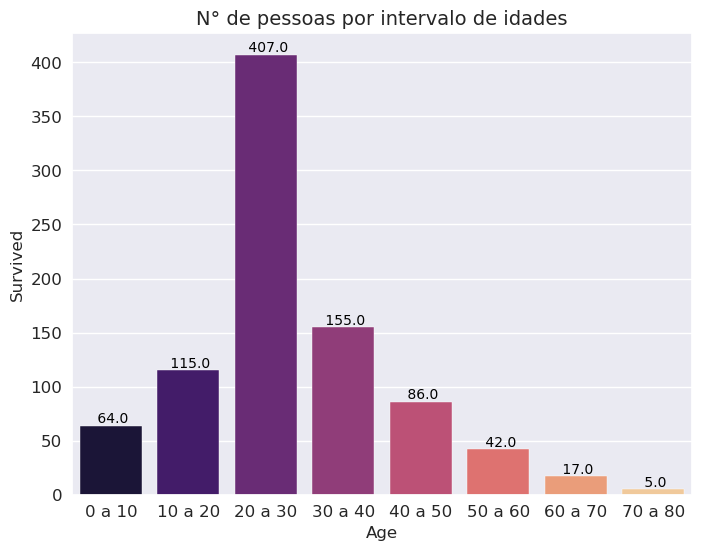

In [173]:
ax = sns.barplot(x=age_groups, y=age_rate, palette='magma')
bar_label(ax)
plt.title('N° de pessoas por intervalo de idades')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

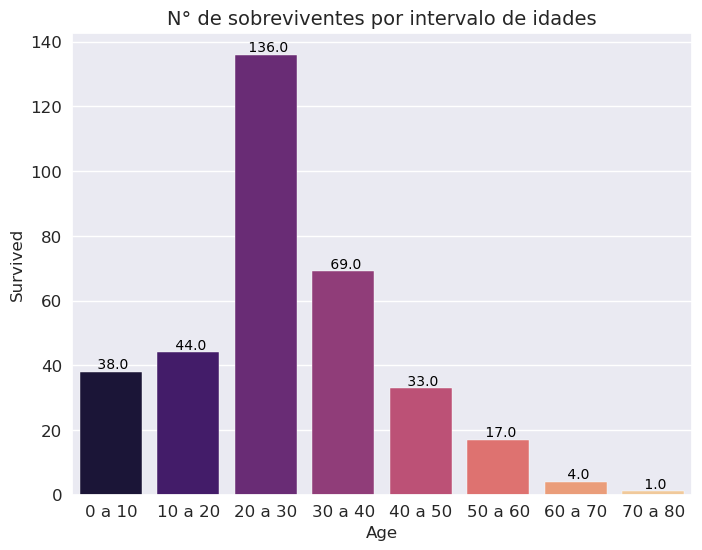

In [174]:
ax = sns.barplot(x=age_groups, y=survival_rate, palette='magma')
bar_label(ax)
plt.title('N° de sobreviventes por intervalo de idades')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

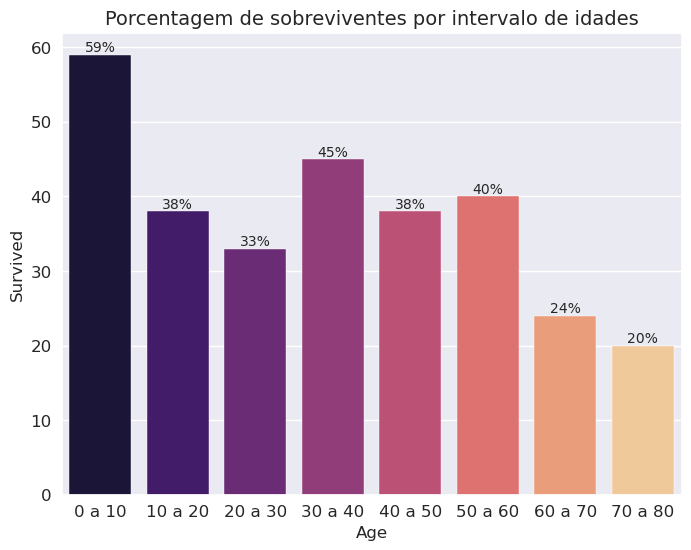

In [175]:
ax = sns.barplot(x=age_groups, y=survival_rate_porc['Porc'], palette='magma')
bar_porc(survival_rate_porc, 'Porc')
plt.title('Porcentagem de sobreviventes por intervalo de idades')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

* Podemos ver que as crianças de 0 a 10 anos, foram as pessoas com maiores porcentagens de sobreviventes, entre os intervalos de idades.
* Assim, temos que as mulheres e crianças foram as pessoas com maiores taxas de sobreviventes.

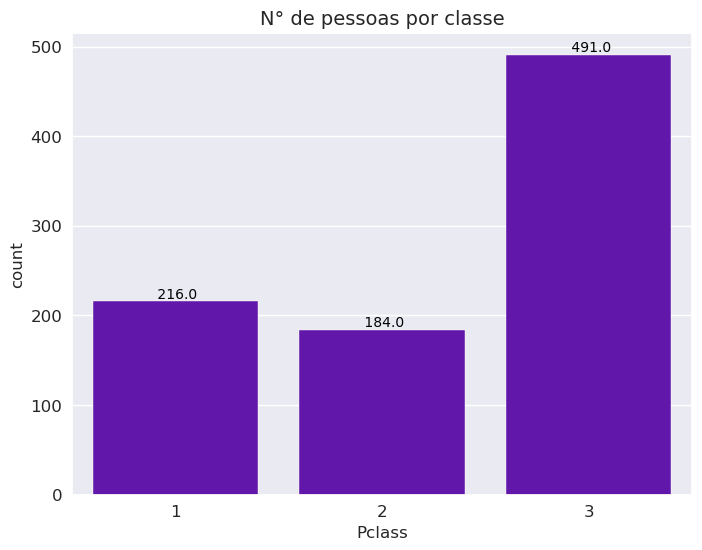

In [176]:
ax = sns.countplot(data=train, x='Pclass', color=my_color)
bar_label(ax)
plt.title('N° de pessoas por classe')
plt.show()

* A quantidade de pessoas que compraram a 3° classe, que é a mais barata, é superior a quantidade de pessoas da 1° e 2° classe juntas.

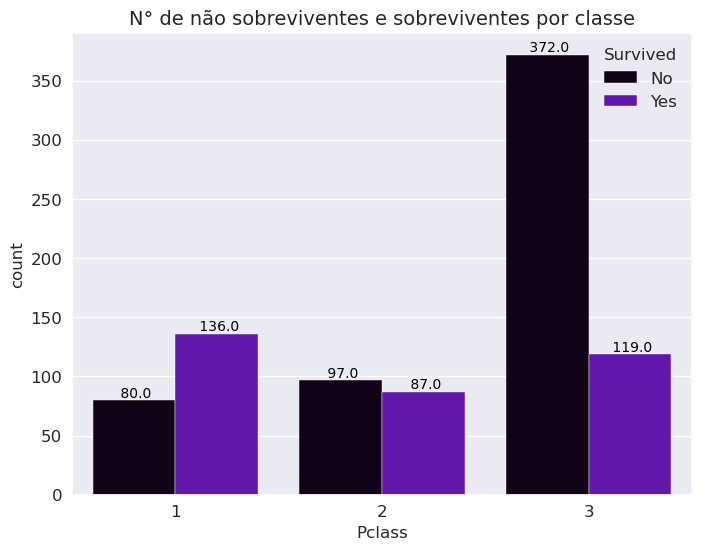

In [177]:
ax = sns.countplot(data=train, x='Pclass', palette=my_palette, hue='Survived')
bar_label(ax)
plt.title('N° de não sobreviventes e sobreviventes por classe')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [178]:
pclass_yes = train.groupby('Pclass')['Survived'].sum() * 100/train.groupby('Pclass')['Survived'].count()
pclass_yes = pclass_yes.round().reset_index()

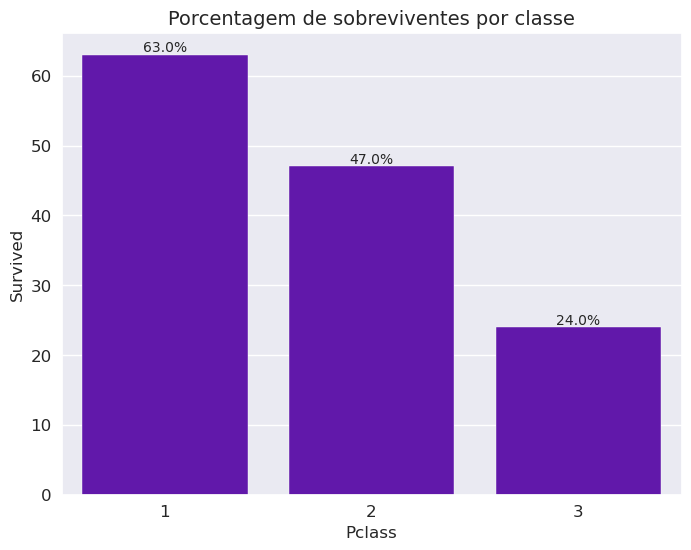

In [179]:
ax = sns.barplot(data=pclass_yes, x='Pclass', y='Survived', color=my_color)
bar_porc(pclass_yes, 'Survived')  
plt.title('Porcentagem de sobreviventes por classe')
plt.show()

* Como demonstrado pelos gráficos anteriores e re-afirmado neste, a 1° classe foi mais privilegiada na fuga do naufrágio, enquanto a 3° classe, poucos se salvaram.

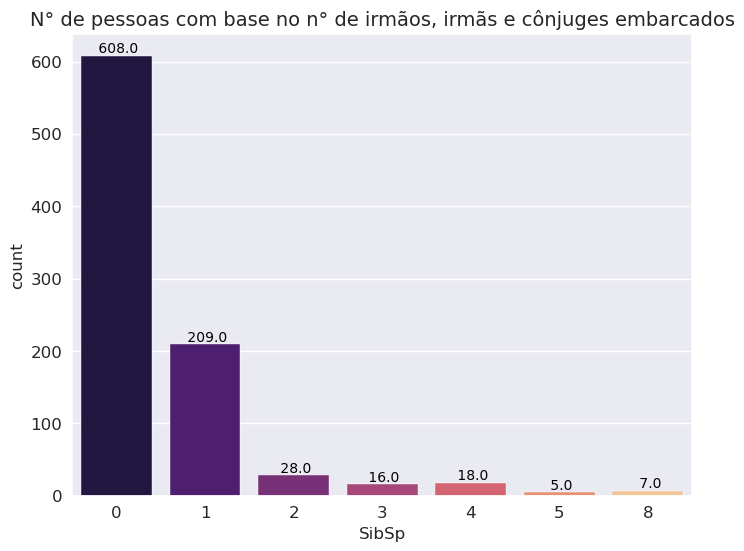

In [180]:
ax = sns.countplot(data=train, x='SibSp' , palette='magma')
bar_label(ax)
plt.title('N° de pessoas com base no n° de irmãos, irmãs e cônjuges embarcados')
plt.show()

* A grande maioria embarcou sozinha.
* Uma pequena quantidade, mas ainda um valor bem relevante, embarcou com irmão ou irmã ou com seu cônjuge.
* Apenas 61 pessoas, embarcaram com um número de duas a oito pessoas, das quais podem ser seus irmãos, irmãs e seus cônjuges.

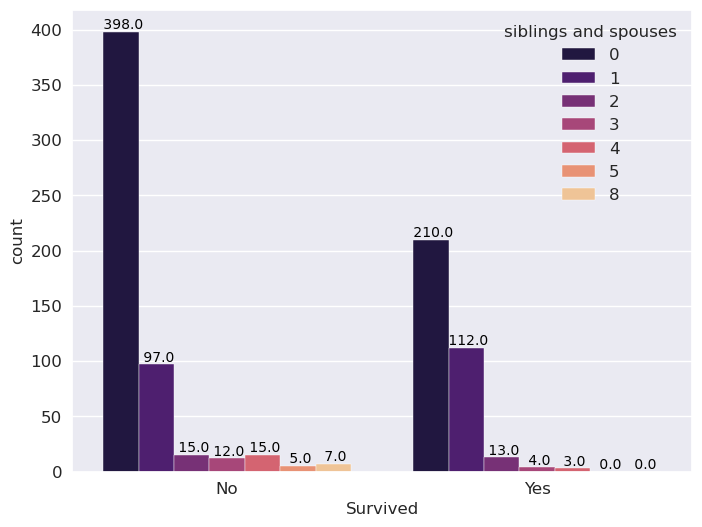

In [181]:
ax = sns.countplot(data=train, x='Survived' , hue='SibSp', palette='magma')
plt.legend(title= 'siblings and spouses', loc='upper right')
ax.set_xticklabels(['No', 'Yes'])
bar_label(ax)
plt.show()

In [182]:
sibsp_yes = train.groupby('SibSp')['Survived'].sum() * 100/train.groupby('SibSp')['Survived'].count()
sibsp_yes = sibsp_yes.round().reset_index()

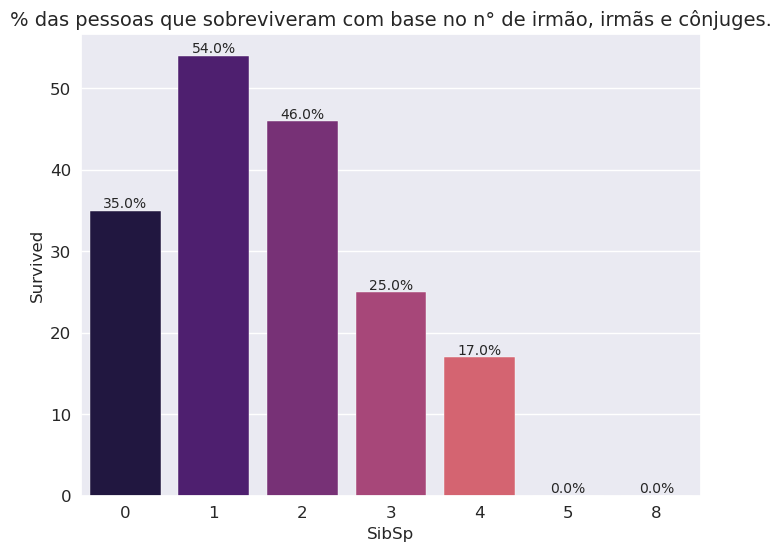

In [183]:
ax = sns.barplot(data=sibsp_yes, x='SibSp', y='Survived', palette='magma')
bar_porc(sibsp_yes,'Survived')
plt.title('% das pessoas que sobreviveram com base no n° de irmão, irmãs e cônjuges.')
plt.show()

* Isso nos diz que, mesmo estando sozinho, não queria dizer que teria mais chances de fuga, pois quem estava acompanhada de mais uma ou duas pessoas, seja irmão, irmã ou cônjuge, teve uma melhor chance de fugir.

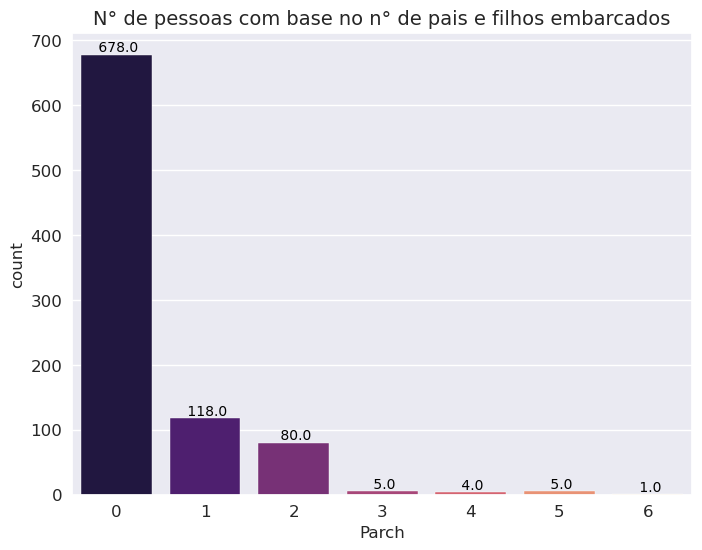

In [184]:
ax = sns.countplot(data=train, x='Parch' , palette='magma')
bar_label(ax)
plt.title('N° de pessoas com base no n° de pais e filhos embarcados')
plt.show()

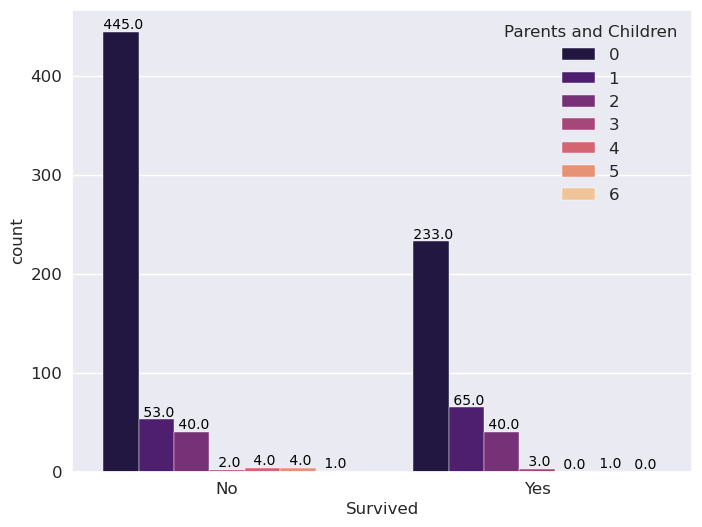

In [185]:
ax = sns.countplot(data=train, x='Survived' , hue='Parch', palette='magma')
plt.legend(title= 'Parents and Children', loc='upper right')
ax.set_xticklabels(['No', 'Yes'])
bar_label(ax)
plt.show()

In [186]:
parch_yes = train.groupby('Parch')['Survived'].sum() * 100/train.groupby('Parch')['Survived'].count()
parch_yes = parch_yes.round().reset_index()

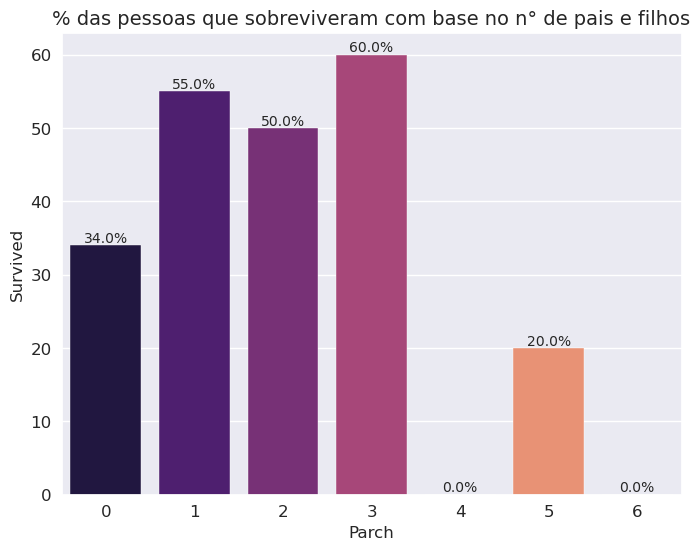

In [187]:
ax = sns.barplot(data=parch_yes, x='Parch', y='Survived', palette='magma')
bar_porc(parch_yes,'Survived')
plt.title('% das pessoas que sobreviveram com base no n° de pais e filhos')
plt.show()

* Parch de 3, é o que possui maior porcentagem, mas como sua quantidade era de apenas 5, é algo muito incerto. Agora Parch de 1, tem bastante quantidade e uma grande porcentagem. Por outro lado, Parch de 0, pessoas que estavam sozinhas, é a que possui maior quantidade de pessoas, mas teve uma grande porcentagem de pessoas que não sobreviveram.

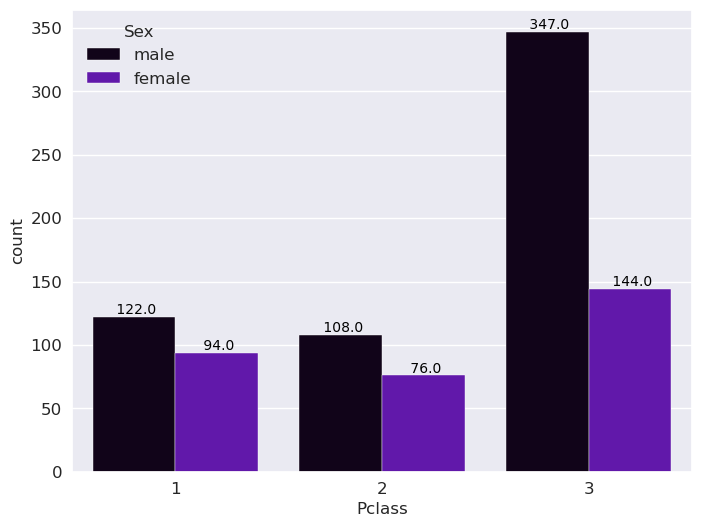

In [188]:
ax = sns.countplot(data=train, x='Pclass', hue='Sex', palette=my_palette)
bar_label(ax)
plt.show()

In [189]:
sex_class = train[train['Survived'] == 1]

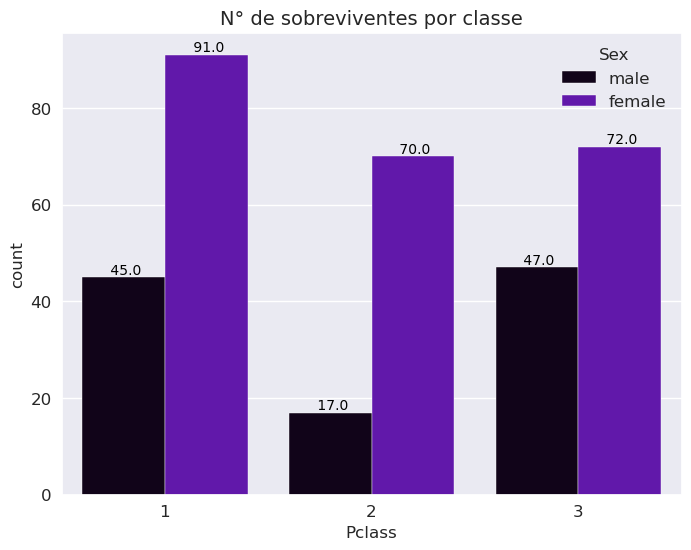

In [190]:
ax = sns.countplot(data=sex_class, x='Pclass' ,hue='Sex', hue_order=['male', 'female'], palette=my_palette)
bar_label(ax)
plt.title('N° de sobreviventes por classe')
plt.show()

* Comparando os dois ultimos gráficos, podemos ver que a quantidade de mulheres que não sobreviveram na 1° e na 2° classe é extremamente baixa, sendo um valor mais relevante na 3° classe, e ainda sendo um valor baixo, comparado a quantidade de homens que não sobreviveram.

## Insight

De acordo com os gráficos e as informações supracitadas, podemos concluir que as mulheres e crianças realmente foram os primeiros a fugir do naufrágio do Titanic e a 3° classe, o local que mais possuia pessoas e com menor tarifa de embarque pela viagem, foi a classe que menos houve sobreviventes. Alem disso, pessoas embarcadas com um irmão, irmã, pai, mãe, filho ou filha, tinham mais taxa de sobreviventes.

## Pré-processamento de dados

In [191]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [192]:
# Re-ordenando as classes, pois a primeira classse tem mais importancia que a terceira, 
# no quesito valor da tarifa de embarque.

train['Pclass'].replace(1, 'c', inplace=True)
train['Pclass'].replace(2, 'b', inplace=True)
train['Pclass'].replace(3, 'a', inplace=True)

In [193]:
test['Pclass'].replace(1, 'c', inplace=True)
test['Pclass'].replace(2, 'b', inplace=True)
test['Pclass'].replace(3, 'a', inplace=True)

In [194]:
# Aplicação do Label Encoder em uma variavel ordinal

for i in ['Pclass']:

  le_train = LabelEncoder()
  train[i] = le_train.fit_transform(train[i])

  le_test = LabelEncoder()
  test[i] = le_test.fit_transform(test[i])

In [195]:
# Aplicação do MinMaxScaler em variaveis que são categóricas ordinais e numericas discretas

minmax = ['Pclass', 'SibSp', 'Parch']
scaler = MinMaxScaler()
train[minmax] = scaler.fit_transform(train[minmax])
test[minmax] = scaler.fit_transform(test[minmax])

In [196]:
# Aplicação do StandardScaler em variaveis que são numericas continuas, por conta dos outliers

scaler_train = StandardScaler()
scaler_test = StandardScaler()
train['Fare'] = scaler_train.fit_transform(train['Fare'].values.reshape(-1, 1))
test['Fare'] = scaler_test.fit_transform(test['Fare'].values.reshape(-1, 1))

In [197]:
x = train.iloc[:,1:]
y = train.iloc[:,:1]['Survived']

In [198]:
# Aplicação do OneHotEncoder nas variaveis "Sex" e "Embarked", pois são variaveis nominais

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 6])], remainder='passthrough')
x = encoder.fit_transform(x)
encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 6])], remainder='passthrough')
test = encoder.fit_transform(test)

In [199]:
test

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.49707917],
       [ 1.        ,  0.        ,  0.        , ...,  0.125     ,
         0.        , -0.51194207],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.46377029],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.50746097],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.49312147],
       [ 0.        ,  1.        ,  1.        , ...,  0.125     ,
         0.11111111, -0.23665406]])

In [200]:
x

array([[ 0.        ,  1.        ,  0.        , ...,  0.125     ,
         0.        , -0.50244517],
       [ 1.        ,  0.        ,  1.        , ...,  0.125     ,
         0.        ,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.48885426],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.125     ,
         0.33333333, -0.17626324],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.04438104],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , -0.49237783]])

In [201]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Ajuste de hiperparâmetros 

DecisionTreeClassifier



In [202]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}

In [203]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(x, y)
y_pred = grid_search.predict(test)
print(f'Melhores parametros: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')

Melhores parametros: {'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Score: 0.8238277572029377


Random Forest

In [1]:
parameters = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(x, y)
y_pred = grid_search.predict(test)
print(f'Melhores parametros: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')


KNN

In [206]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [207]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x, y)
y_pred = grid_search.predict(test)
print(f'Melhores parametros: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')

Melhores parametros: {'n_neighbors': 10, 'p': 1}
Score: 0.7912623187496076


Regressão Logistica

In [208]:
# tol: se o número de erros n diminuir de acordo com a tol, o algoritmo para
# C: quanto maior o valor, mais o algoritmo tenta se encaixar nos dados
# solver: encontra os coeficientes, ajuste dos valores.

parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0,1.5,2.0, 3.0, 5.0],
              'solver': ['newton-cg', 'liblinear', 'sag', 'saga']}

In [209]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x, y)
y_pred = grid_search.predict(test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [210]:
print(f'Melhores parametros: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')

Melhores parametros: {'C': 1.0, 'solver': 'newton-cg', 'tol': 0.0001}
Score: 0.7878915322327538


SVM

In [211]:
# tol: se o número de erros n diminuir de acordo com a tol, o algoritmo para
# C: quanto maior o valor, mais o algoritmo tenta se encaixar nos dados
# solver: encontra os coeficientes, ajuste dos valores.

parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0,1.5,2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [212]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x, y)
y_pred = grid_search.predict(test)
print(f'Melhores parametros: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')

Melhores parametros: {'C': 1.5, 'kernel': 'linear', 'tol': 0.001}
Score: 0.7878601468834348


Redes Neurais

In [213]:
# activation: função de ativação
# solver: encontra os coeficientes, ajuste dos valores.
# batch_size: quantos registros vai enviar para fazer a avaliação dos pesos

parametros = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'batch_size': [10, 56]}

In [214]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x, y)
y_pred = grid_search.predict(test)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

In [215]:
print(f'Melhores parametros: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')

Melhores parametros: {'activation': 'tanh', 'batch_size': 56, 'solver': 'adam'}
Score: 0.8193019898311469


### Validação Cruzada

In [216]:
# n_splits: numero de divisoes de treinamento e teste
# shuffle: misturar os dados

results_forest = []
results_random_forest = []
results_knn = []
results_logistic = []
results_svm = []
results_neural = []

for i in range(10):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    forest = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 10, min_samples_split= 2, splitter= 'best')
    score = cross_val_score(forest, x, y, cv=kfold)
    results_forest.append(score.mean())

    random_forest = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
    score = cross_val_score(random_forest, x, y, cv=kfold)
    results_random_forest.append(score.mean())

    knn = KNeighborsClassifier(n_neighbors= 10, p= 1)
    score = cross_val_score(knn, x, y, cv=kfold)
    results_knn.append(score.mean())
    
    logistic = LogisticRegression(C= 1.0, solver= 'newton-cg', tol= 0.0001)
    score = cross_val_score(logistic, x, y, cv=kfold)
    results_logistic.append(score.mean())

    svm = SVC(C= 1.5, kernel= 'linear', tol= 0.001)
    score = cross_val_score(svm, x, y, cv=kfold)
    results_svm.append(score.mean())

    rede_neural = MLPClassifier(activation= 'relu', batch_size= 56, solver= 'adam')
    score = cross_val_score(rede_neural, x, y, cv=kfold)
    results_neural.append(score.mean())


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [217]:
results = pd.DataFrame({'arvore': results_forest, 'random_forest': results_random_forest, 'knn': results_knn, 'logistica': results_logistic, 'svm': results_svm, 'rede_neural': results_neural})

In [218]:
results

,arvore,random_forest,knn,logistica,svm,rede_neural
0,0.821561,0.821561,0.787890,0.794619,0.786742,0.815955
1,0.811436,0.830599,0.786816,0.793521,0.786816,0.818252
2,0.808140,0.815955,0.778964,0.790187,0.786779,0.817091
3,0.813708,0.830512,0.790075,0.797978,0.786692,0.806941
4,0.824856,0.828252,0.784419,0.792310,0.786704,0.818102
5,0.815968,0.828315,0.784557,0.794632,0.786804,0.818177
6,0.810325,0.830512,0.783396,0.794594,0.786742,0.820412
7,0.795780,0.820462,0.794619,0.794644,0.786779,0.811448
8,0.804769,0.824944,0.773358,0.796904,0.786829,0.808240
9,0.820437,0.837278,0.782310,0.794607,0.786767,0.818190


In [219]:
results.mean()

arvore           0.812698
random_forest    0.826839
knn              0.784640
logistica        0.794400
svm              0.786765
rede_neural      0.815281
dtype: float64

### Teste de Shapiro

Utilizamos o teste de Shapiro para verificar se os resultados seguem uma distribuição normal. Quando não segue uma distribuição normal, isso pode indicar que o modelo não está capturando completamente a complexidade dos dados ou que há algum tipo de violação dos pressupostos do modelo. Podendo levar a resultados imprecisos ou incorretos, e os resultados e conclusões obtidos a partir do modelo podem ser questionáveis.

In [220]:
# confiabilidade
alpha = 0.05

# valores de p maiores que alpha, estão na distribuição normal
# os q estão a baixo, são a hipotese alternativa, enquanto os maiores são hipoteses nulas
shapiro = pd.DataFrame({'predictive machine': ['Decision Tree Forest', 'Random Forest', 'KNN', 'Logist Regression', 'SVM', 'Neural Networks'],
                        'Shapiro - p': [shapiro(results_forest)[1], shapiro(results_random_forest)[1], shapiro(results_knn)[1], shapiro(results_logistic)[1], shapiro(results_svm)[1], shapiro(results_neural)[1]]})
shapiro

,predictive machine,Shapiro - p
0,Decision Tree Forest,0.914994
1,Random Forest,0.759371
2,KNN,0.975059
3,Logist Regression,0.346748
4,SVM,0.740721
5,Neural Networks,0.030779


* A máquina  preditiva Neural Networks, rejeitou o a hipótese nula, logo sua distribuição não é normal, mas o restante das máquinas preditivas possuem distribuição normal.

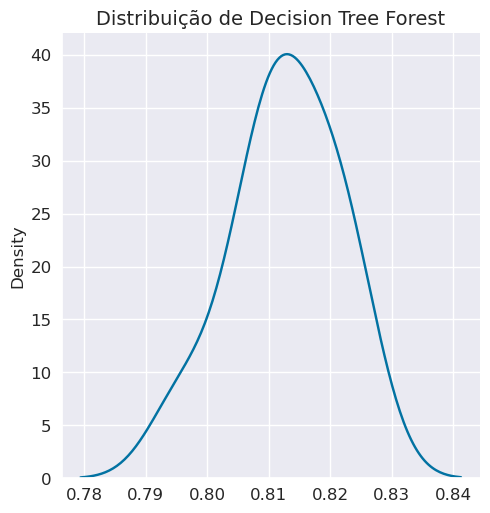

In [221]:
sns.displot(results_forest, kind='kde')
plt.title('Distribuição de Decision Tree Forest')
plt.show()

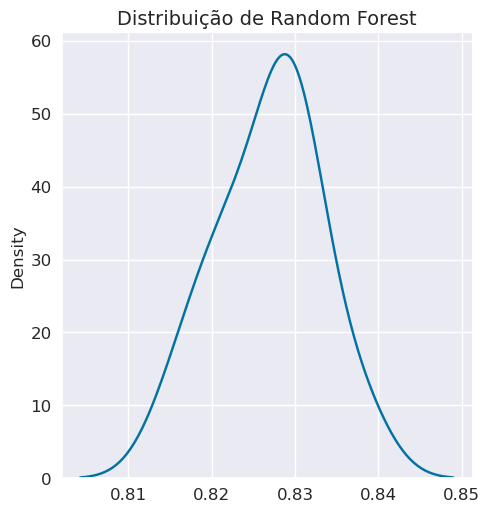

In [222]:
sns.displot(results_random_forest, kind='kde')
plt.title('Distribuição de Random Forest')
plt.show()

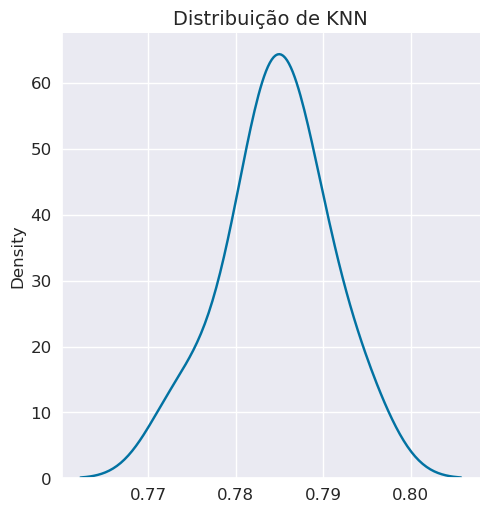

In [223]:
sns.displot(results_knn, kind='kde')
plt.title('Distribuição de KNN')
plt.show()

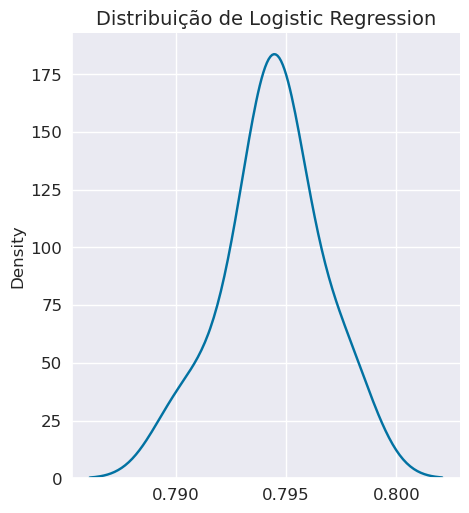

In [224]:
sns.displot(results_logistic, kind='kde')
plt.title('Distribuição de Logistic Regression')
plt.show()

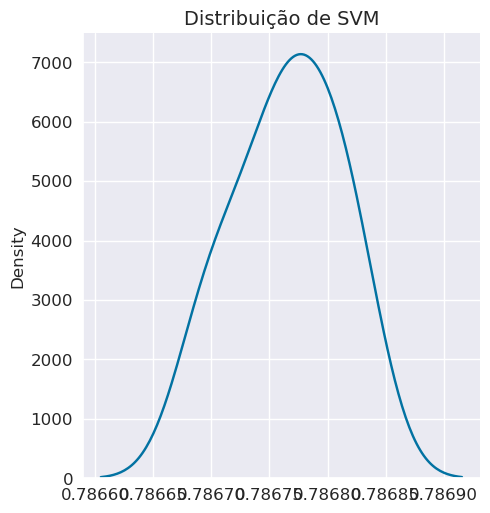

In [225]:
sns.displot(results_svm, kind='kde')
plt.title('Distribuição de SVM')
plt.show()

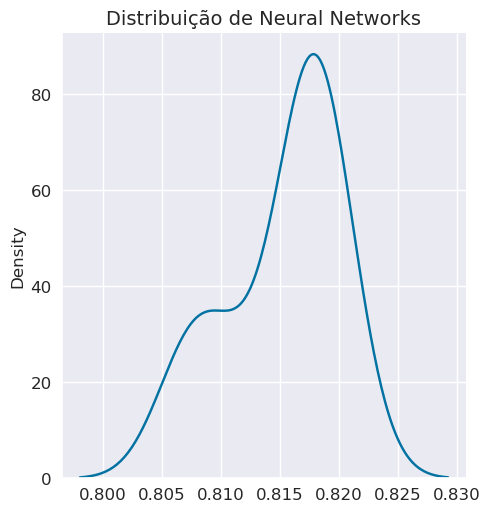

In [226]:
sns.displot(results_neural, kind='kde')
plt.title('Distribuição de Neural Networks')
plt.show()

### teste ANOVA

O teste de ANOVA é  utilizado em pesquisas científicas, estudos clínicos, análise de dados de mercado, análise de desempenho de produtos ou serviços, entre outras áreas. O teste deve ser usado sempre que desejamos comparar as médias de três ou mais grupos de dados e determinar se essas diferenças são estatisticamente significativas.

In [227]:
statistic, p = f_oneway(results_forest, results_random_forest, results_knn, results_logistic, results_svm, results_neural)
print("Estatística do teste ANOVA:", statistic)
print("Valor p:", p)

Estatística do teste ANOVA: 102.2256604529578
Valor p: 2.861144143947922e-26


* Se o valor de "statistic" for grande, significa que a variação entre os modelos é significativamente maior do que a variação dentro dos modelos, o que indica que as médias dos modelos são diferentes e a hipótese alternativa é provavelmente verdadeira.
* Por outro lado, se o valor de "statistic" for pequena, significa que a variação entre os modelos é semelhante ou menor do que a variação dentro dos modelos, o que indica que as médias dos modelos são provavelmente iguais e a hipótese nula é mais plausível.
* Mas se o valor p for menor do que um nível de significância escolhido, a hipótese nula é rejeitada e conclui-se que as médias dos grupos são diferentes.

In [228]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes. Existe diferença estátistica entre os dados.')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais. Não existe diferença estátistica entre os dados.')

Hipótese nula rejeitada. Dados são diferentes. Existe diferença estátistica entre os dados.


* Como temos uma rejeição da hipotese nula, podemos fazer o teste de Tukey para comparar as médias de múltiplos modelos.

### Teste de Tukey

O teste de Tukey é uma técnica útil para identificar quais modelos apresentam diferenças significativas entre si e só deve ser realizado se a ANOVA indicar que há diferenças significativas entre as médias dos modelos.

In [229]:
results_algorithms = {'accuracy': np.concatenate([results_forest, results_random_forest, results_knn, results_logistic, results_svm, results_neural]),
'algoritmo': ['forest' for i in range(10)] + ['random_forest' for i in range(10)] + ['knn' for i in range(10)] + ['logistic' for i in range(10)] + ['svm' for i in range(10)] + ['neural' for i in range(10)]}

In [230]:
results_df = pd.DataFrame(results_algorithms)

In [231]:
comparison_algorithms = MultiComparison(results_df['accuracy'], results_df['algoritmo'])
test_statistical = comparison_algorithms.tukeyhsd()
print(test_statistical)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       forest           knn  -0.0281   -0.0 -0.0352 -0.0209   True
       forest      logistic  -0.0183    0.0 -0.0254 -0.0112   True
       forest        neural   0.0026 0.8907 -0.0045  0.0097  False
       forest random_forest   0.0141    0.0   0.007  0.0213   True
       forest           svm  -0.0259    0.0 -0.0331 -0.0188   True
          knn      logistic   0.0098 0.0022  0.0026  0.0169   True
          knn        neural   0.0306   -0.0  0.0235  0.0378   True
          knn random_forest   0.0422   -0.0  0.0351  0.0493   True
          knn           svm   0.0021 0.9495  -0.005  0.0093  False
     logistic        neural   0.0209    0.0  0.0138   0.028   True
     logistic random_forest   0.0324   -0.0  0.0253  0.0396   True
     logistic           svm  -0.0076 0.0291 -0.0148 -0.0005   

* Ao observamos as combinações de máquinas preditivas, as unicas máquinas que rejeitaram a hipótese nula em todas as combinações, foram a RandomForest e Logistic Regression

## Previsão

Utilizaremos o algoritmo de aprendizado RandomForest, pois sua média nos resultados da validação cruzada, foram maiores que as demais máquinas, tambem passou no teste de Shapiro, indicando que esses mesmos resultados seguem uma distribuição normal. E com o teste de ANOVA, observamos que existe diferença estátistica entre as máquinas, nos levando ao teste de Tukey, no qual, chegamos a conclusão de que a média de RandomForest é significativamente diferente das demais.

In [232]:
rf = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)
rf.fit(x, y)
y_pred_rf = rf.predict(test)
print(f'Accuracy score: {accuracy_score(result, y_pred_rf)}')
print(f'Confusion Matrix: \n{confusion_matrix(result, y_pred_rf)}')
print(f'Classification Report: \n{classification_report(result, y_pred_rf)}')

Accuracy score: 0.8779904306220095
Confusion Matrix: 
[[252  14]
 [ 37 115]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       266
           1       0.89      0.76      0.82       152

    accuracy                           0.88       418
   macro avg       0.88      0.85      0.86       418
weighted avg       0.88      0.88      0.88       418



0.8779904306220095

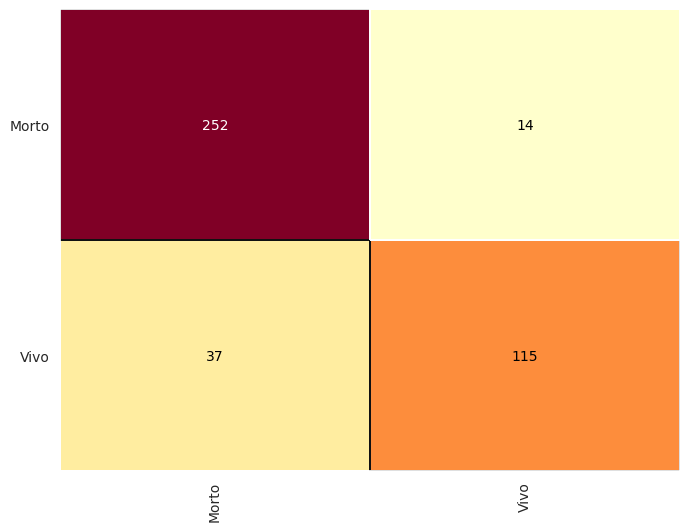

In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

classes = ['Morto', 'Vivo']
cm = ConfusionMatrix(rf, classes=classes, label_encoder={0:'Morto', 1:'Vivo'})
cm.fit(x, y)
cm.score(test, result)

In [234]:
output = pd.DataFrame({'PassengerId': id_test, 'Survived': y_pred_rf})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
